## Gas differences based on consumption

Do the same analysis for gas prices.

In [ ]:
g_column_list = ['Gas: Very Small (Pence per kWh)', 
                 'Gas: Small (Pence per kWh)', 
                 'Gas: Medium (Pence per kWh)',
                 'Gas: Large (Pence per kWh)',
                 'Gas: Very Large (Pence per kWh)'
]

In [ ]:
# create a new column in the dataframe which is the difference between the largest and smallest consumers costs.
gprice['Gas difference'] = gprice['Gas: Very Small (Pence per kWh)'] - gprice['Gas: Extra Large (Pence per kWh)']

# create a new column to calculate the percentage difference
gprice['Gas percentage difference'] = (gprice['Gas difference'] / gprice['Gas: Extra Large (Pence per kWh)']) * 100

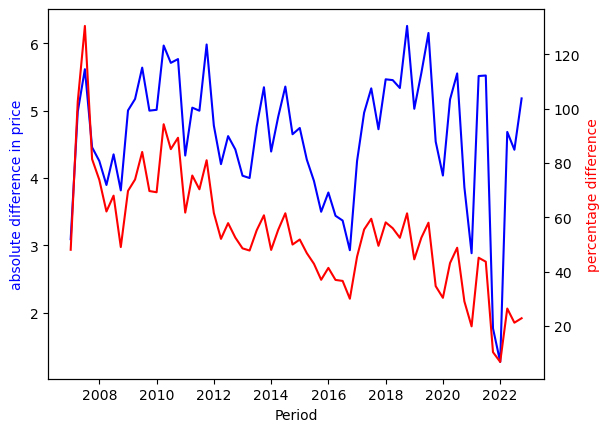

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first series of data on the first y-axis
ax1.plot(gprice['period'], gprice['Gas difference'], 'b-')
ax1.set_xlabel('Period')
ax1.set_ylabel('absolute difference in price', color='b')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(gprice['period'], gprice['Gas percentage difference'], 'r-')
ax2.set_ylabel('percentage difference', color='r')

plt.show()

### I now want to create a plot showing these differences between all the different energy groups to the average price

In [ ]:
# create lists of the column names without period or averages for computing the difference from the mean.

e_column_list = ['Gas: Very Small (Pence per kWh)', 
                'Gas: Small (Pence per kWh)', 
                'Gas: Small/Medium (Pence per kWh)', 
                'Gas: Medium (Pence per kWh)',
                'Gas: Large (Pence per kWh)',
                'Gas: Very Large (Pence per kWh)',
                'Gas: Extra Large (Pence per kWh)' 
]


In [ ]:
gprice.head(1)

,period,Electricity: Very Small (Pence per kWh),Electricity: Small (Pence per kWh),Electricity: Small/Medium (Pence per kWh),Electricity: Medium (Pence per kWh),Electricity: Large (Pence per kWh),Electricity: Very Large (Pence per kWh),Electricity: Extra Large (Pence per kWh),Electricity: Average (Pence per kWh),elec difference,elec percentage difference
0,2004-01-01,6.0419,5.491762,4.13975,3.639109,3.376946,2.975759,NaN,4.015,NaN,NaN


In [ ]:
# create a new dataframe to hold the absoute difference
abs_difference = pd.DataFrame()
percent_difference = pd.DataFrame()

# add the period into these dataframes
abs_difference['period'] = gprice['period'].copy()
percent_difference['period'] = gprice['period'].copy()

# Iterate through the columns and find the difference from the mean in absolute terms.
for col in e_column_list:
    abs_difference[f'{col} difference'] = gprice[col] - gprice['Gas: Average (Pence per kWh)']
    percent_difference[f'{col} percentage difference'] = (abs_difference[f'{col} difference'] / gprice['Gas: Average (Pence per kWh)']) * 100
   

In [ ]:
percent_difference.head()

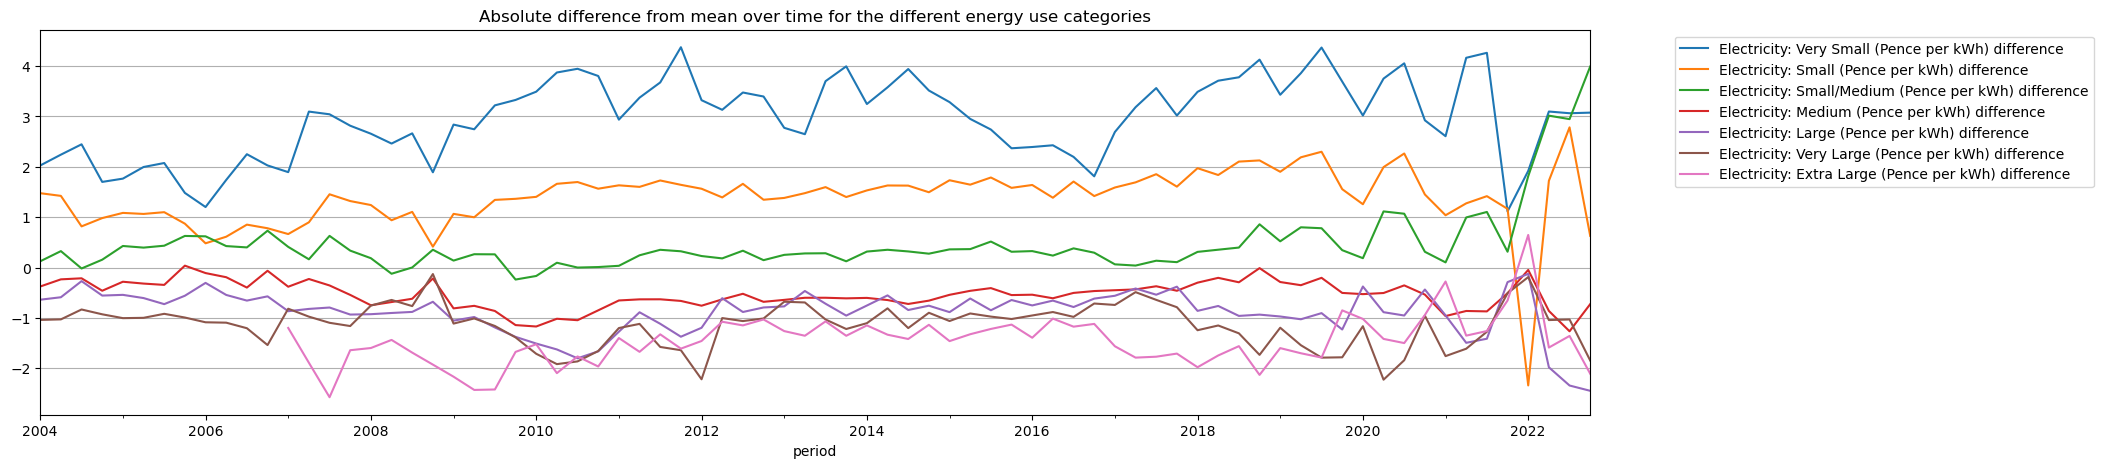

In [ ]:
abs_difference.plot(x='period', figsize=(20, 5))

# Move the legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# add y gridlines
plt.grid(axis='y')
plt.title('Absolute difference from mean over time for the different energy use categories')
plt.show()

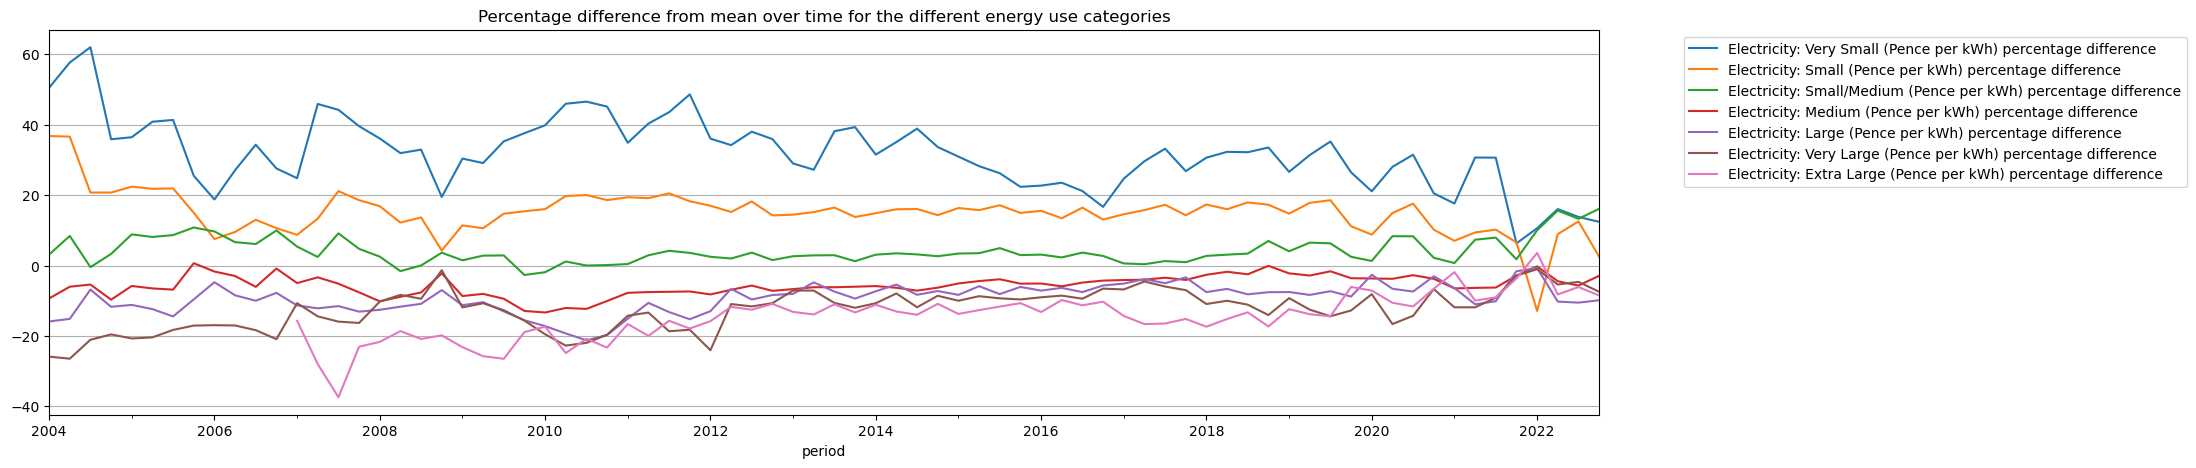

In [ ]:
percent_difference.plot(x='period', figsize=(20, 5))

# Move the legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# add y gridlines
plt.grid(axis='y')

plt.title('Percentage difference from mean over time for the different energy use categories')
plt.show()

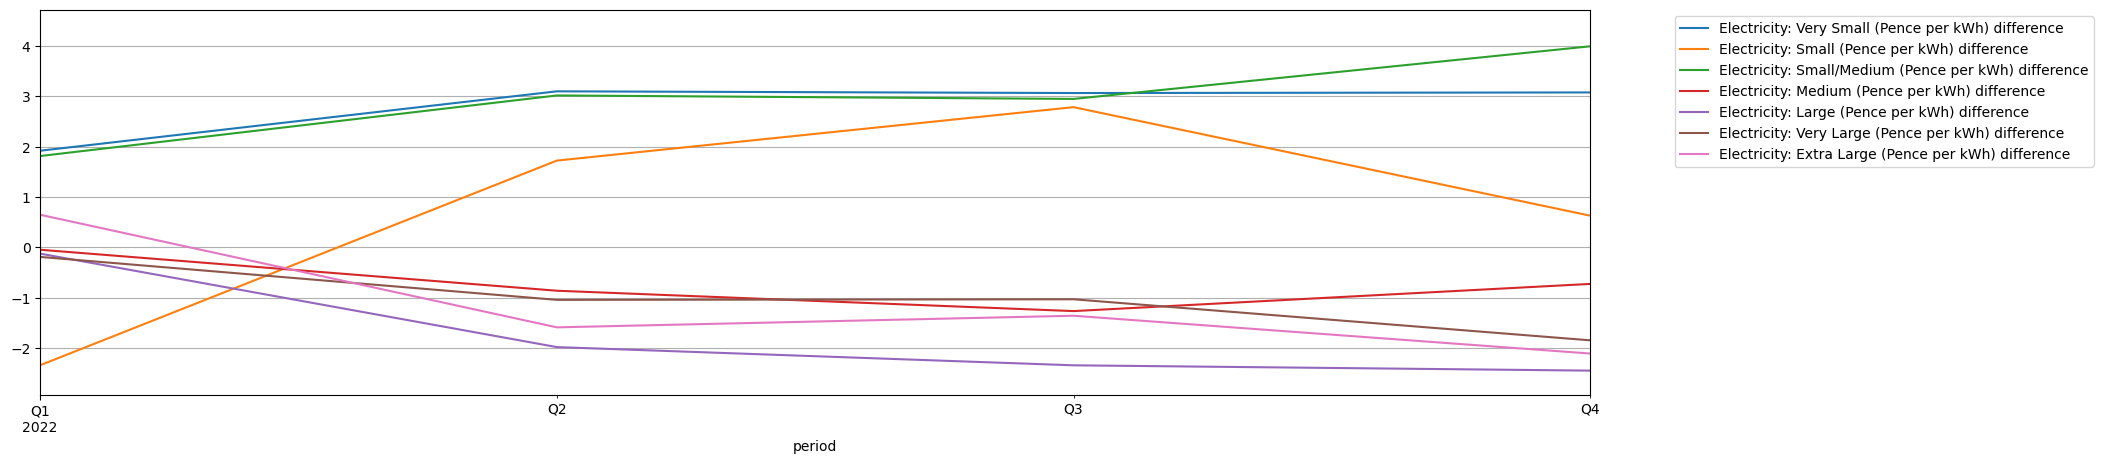

In [ ]:
# plot the time recent time period or large energy price inflation (post start of the ukrane war)

abs_difference.plot(x='period', figsize=(20, 5))

# Set the x-axis limits
plt.xlim(['2022-01-02', '2022-10-01'])

plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


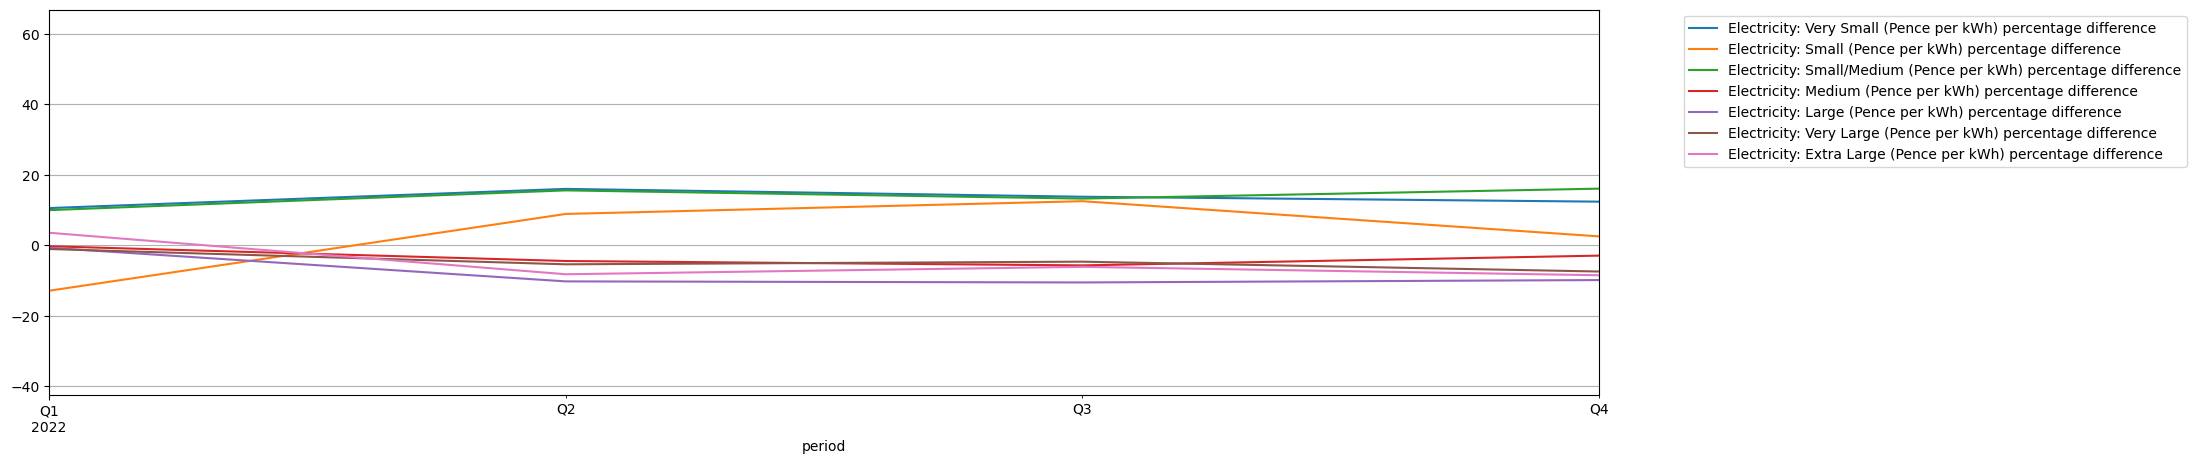

In [ ]:
# plot the time recent time period for large energy price inflation (post start of the ukrane war)

percent_difference.plot(x='period', figsize=(20, 5))

# Set the x-axis limits
plt.xlim(['2022-01-02', '2022-10-01'])

plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Visualise spread of the differences to the mean for the different energy users

#### Absoule difference

In [ ]:
abs_difference.head(1)

,period,Electricity: Very Small (Pence per kWh) difference,Electricity: Small (Pence per kWh) difference,Electricity: Small/Medium (Pence per kWh) difference,Electricity: Medium (Pence per kWh) difference,Electricity: Large (Pence per kWh) difference,Electricity: Very Large (Pence per kWh) difference,Electricity: Extra Large (Pence per kWh) difference
0,2004-01-01,2.0269,1.476762,0.12475,-0.375891,-0.638054,-1.039241,NaN


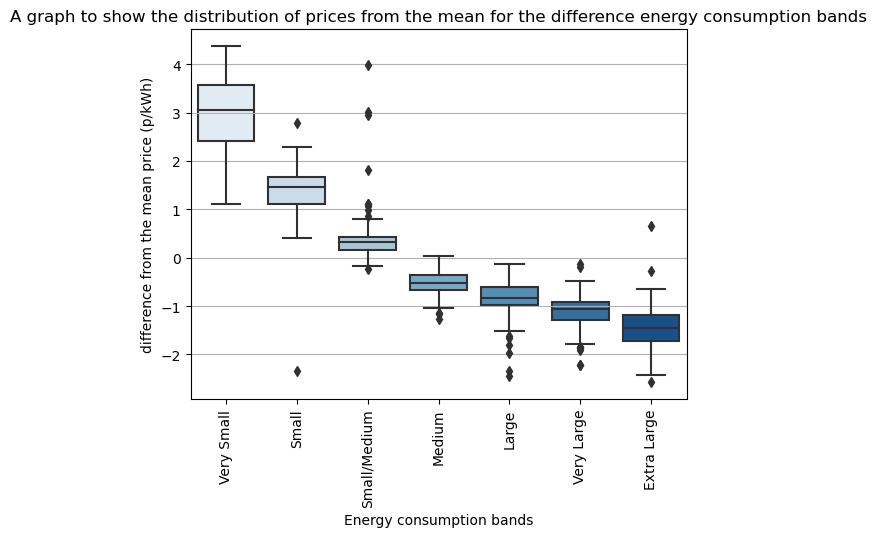

In [ ]:
# visualise the spending on each day of the week for the dataset.

# drop the period as we don't need it for the plot
df = abs_difference.drop(['period'], axis=1)

# rename the columns for the plot
df.rename(columns={'Gas: Very Small (Pence per kWh) difference':'Very Small',
                   'Gas: Small (Pence per kWh) difference':'Small',
                   'Gas: Small/Medium (Pence per kWh) difference':'Small/Medium',
                   'Gas: Medium (Pence per kWh) difference':'Medium',
                   'Gas: Large (Pence per kWh) difference':'Large',
                   'Gas: Very Large (Pence per kWh) difference':'Very Large',
                   'Gas: Extra Large (Pence per kWh) difference':'Extra Large'},
                   inplace = True
)

# melt the df's into long format
df_melted = pd.melt(df)

# create a boxplot for each column
sns.boxplot(data=df_melted, x="variable", y="value", palette='Blues')

# rotate the x labels
plt.xticks(rotation=90)

# add axis labels
plt.xlabel('Energy consumption bands')
plt.ylabel('difference from the mean price (p/kWh)')

plt.title('A graph to show the distribution of prices from the mean for the difference energy consumption bands')
plt.grid(axis='y')

#### Percentage difference

In [ ]:
percent_difference.head(1)

,period,Electricity: Very Small (Pence per kWh) percentage difference,Electricity: Small (Pence per kWh) percentage difference,Electricity: Small/Medium (Pence per kWh) percentage difference,Electricity: Medium (Pence per kWh) percentage difference,Electricity: Large (Pence per kWh) percentage difference,Electricity: Very Large (Pence per kWh) percentage difference,Electricity: Extra Large (Pence per kWh) percentage difference
0,2004-01-01,50.4832,36.78112,3.107092,-9.362169,-15.891758,-25.883951,NaN


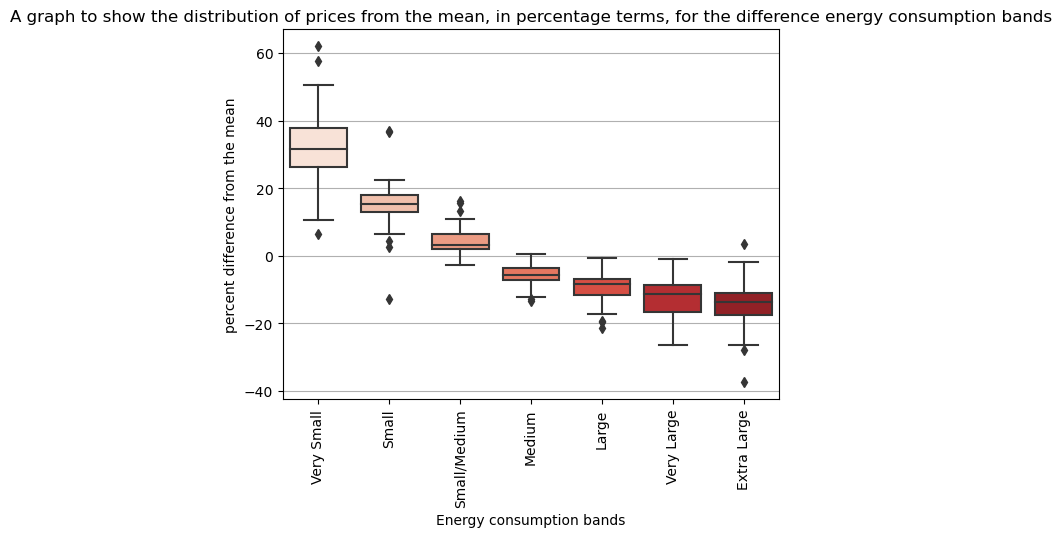

In [ ]:
# drop the period as we don't need it for the plot
df = percent_difference.drop(['period'], axis=1)

# rename the columns for the plot
df.rename(columns={'Gas: Very Small (Pence per kWh) percentage difference':'Very Small',
                   'Gas: Small (Pence per kWh) percentage difference':'Small',
                   'Gas: Small/Medium (Pence per kWh) percentage difference':'Small/Medium',
                   'Gas: Medium (Pence per kWh) percentage difference':'Medium',
                   'Gas: Large (Pence per kWh) percentage difference':'Large',
                   'Gas: Very Large (Pence per kWh) percentage difference':'Very Large',
                   'Gas: Extra Large (Pence per kWh) percentage difference':'Extra Large'},
                   inplace = True
)

# melt the df's into long format
df_melted = pd.melt(df)

# create a boxplot for each column
sns.boxplot(data=df_melted, x="variable", y="value", palette='Reds')

# rotate the x labels
plt.xticks(rotation=90)

# add axis labels
plt.xlabel('Energy consumption bands')
plt.ylabel('percent difference from the mean')

plt.title('A graph to show the distribution of prices from the mean, in percentage terms, for the difference energy consumption bands')
plt.grid(axis='y')